# OSM 2018 Economics 
## Problem Set 3
### 07.09.2018 
### Yung-Hsu Tsui*
* I thank Jay-Hyung Kim for his precious comments.

## Exercise 1

Using the calibration from Section 2.6, write a Python function named feasible()

In [10]:
# Feasible Function
import numpy as np

def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta =f_params
    b2  = bvec_guess[0]
    b3  = bvec_guess[1]
    
    K = b2 + b3
    L = nvec[0]+nvec[1]+nvec[2]
    r = alpha*A*(K**(alpha-1))*(L**(1-alpha))
    w = (1-alpha)*A*(K**alpha) * (L**(-alpha))
    c1 = w - b2
    c2 = w + (1+r) * b2 - b3
    c3 = 0.2*w+(1+r)*b3
    
    # Test for K
    if K <= 0:
        K_constr = 1
        
    else:
        K_constr = 0
        
    # Test for Consumption
    
    
    if c1 <= 0:
        c_cnstr1 = 1
    else:
        c_cnstr1 = 0

    if c2 <= 0:
        c_cnstr2 = 1
    else:
        c_cnstr2 = 0
        
    if c3 <= 0:
        c_cnstr3 = 1
    else:
        c_cnstr3 = 0
        
    
    c_cnstr = (c_cnstr1,c_cnstr2,c_cnstr3)
    

    if ( c_cnstr[1] == 1 ):
        b_cnstr1 = 1
        b_cnstr2 = 1
        
    elif (c_cnstr[1] !=1 ):
        
        if c_cnstr[0]==1 :
            b_cnstr1 = 1
            if c_cnstr[2] ==1:
                b_cnstr2 = 1
            elif c_cnstr[2] != 1:
                b_cnstr2 = 0
                
        elif (c_cnstr[0] !=1):
            b_cnstr1 = 0
            if c_cnstr[2] ==1:
                b_cnstr2 = 1
            elif c_cnstr[2] != 1:
                b_cnstr2 = 0
    
    b_cnstr = (b_cnstr1,b_cnstr2)    
    
    return b_cnstr, c_cnstr, K_constr

In [11]:
#Set Parameters
nvec = np.array([1.0,1.0,0.2])
beta = 0.442
delta = 0.6415
sigma = 3.0
A = 1
alpha = 0.35
f_params = (nvec, A, alpha, delta)

### Exercise 1.1
Which, if any, of the constraints is violated if you choose an initial guess for steady-state savings of bvec_guess = np.array([1.0, 1.2])?

In [18]:
bvec_guess = np.array([1, 1.2])
feasible(f_params, bvec_guess)

((1, 0), (1, 0, 0), 0)

### Exercise 1.2
Which, if any, of the constraints is violated if you choose an initial guess for steady-state savings of bvec_guess = np.array([0.06, -0.001])?

In [7]:
bvec_guess = np.array([0.06, -.001])
feasible(f_params, bvec_guess)

((0, 0), (0, 0, 0), 0)

### Exercise 1.3
Which, if any, of the constraints is violated if you choose an initial guess for steady-state savings of bvec_guess = np.array([0.1, 0.1])?

In [19]:
bvec_guess = np.array([0.01, 0.1])
feasible(f_params, bvec_guess)

((0, 0), (0, 0, 0), 0)

## Exercise 2
Use the calibration from Section 2.6 and the steady-state equilibrium Definition 2.1. Write a function named get SS()

In [12]:
import scipy.optimize as opt

def get_w(bvec,w_args):
    b2, b3 = bvec
    alpha, A, nvec = w_args
    K = b2 + b3
    L = nvec[0]+nvec[1]+nvec[2]
    w = (1-alpha)*A*(K**alpha) * (L**(-alpha))
    
    return w


def get_r(bvec, r_args):
    b2, b3 = bvec
    alpha, A, nvec,delta = r_args
    K = b2 + b3
    L = nvec[0]+nvec[1]+nvec[2]
    
    r = alpha*A*(K**(alpha-1))*(L**(1-alpha)) - delta
    return r


def Eul_errs(bvec, *args):
    
    A, alpha, beta, sigma, nvec,delta = args
    
    r_args = (alpha, A, nvec,delta)
    w_args = (alpha, A, nvec)
    
    r = get_r(bvec,r_args)
    w = get_w(bvec,w_args)
    
    eul_err = np.zeros([1,2])
    
    b2=bvec[0]
    b3=bvec[1]
    
    n1=nvec[0]
    n2=nvec[1]
    n3=nvec[2]
    
    c1 = w*n1 - b2
    c2 = (1+r)*b2 + w*n2 - b3
    c3 = (1+r)*b3 + w*n3
    
    err1 = (c1)**(-sigma) - beta * (1+r)*((c2)**(-sigma))
    err2 = (c2)**(-sigma) - beta * (1+r)*((c3)**(-sigma))
    err_vec = np.array([err1, err2])

    
    return err_vec



def get_SS(params, bvec_guess, SS_graphs=True):
    
    import time
    
    start_time = time.clock() # Place at beginning of get_SS()
    
    
    beta, sigma, nvec, L, A, alpha, delta, SS_tol  = params
    
    
    
    args1 = (A, alpha, beta, sigma, nvec,delta)
    
    
    #b2  = bvec_guess[0]
    #b3  = bvec_guess[1]
    
    
    results = opt.root(Eul_errs,np.array([bvec_guess[0],bvec_guess[1]]),args=args1)

    b_ss = results.x
    
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    
    w_ss = (1-alpha)*A*(K_ss**alpha) * (L_ss**(-alpha))
    r_ss = alpha*A*(K_ss**(alpha-1))*(L_ss**(1-alpha))-delta
    
    c_ss1 = nvec[0]*w_ss - b_ss[0]
    c_ss2 = nvec[1]*w_ss + (1+r_ss)*b_ss[0] - b_ss[1]
    c_ss3 = nvec[2]*w_ss + (1+r_ss)*b_ss[1]
    c_ss = np.array([c_ss1,c_ss2,c_ss3])
    C_ss = np.sum(c_ss)
    Y_ss = A*(K_ss**alpha)*((L_ss)**(1-alpha))
    
    EulErr_ss = results.fun
    RCerr_ss = Y_ss-C_ss -delta*K_ss
    ss_time = time.clock() - start_time # Place at end of get_SS()
    
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss, 'ss_time': ss_time}
    return ss_output

### Exercise 2.1
Solve numerically for the steady-state equilibrium values. List those values. Time your function. How long did it take to compute the steady-state?

In [20]:
SS_tol = 10**(-8)
#params=(beta, sigma, nvec, L, A, alpha, delta, SS_tol)
params=(0.442, 3, np.array([1.0,1.0,0.2]), np.sum(np.array([1.0,1.0,0.2])), 1, 0.35, 0.6415, SS_tol)
bvec_guess = np.array([0.5,0.8])
S = get_SS(params, bvec_guess)
S

{'C_ss': 0.6329006729415257,
 'EulErr_ss': array([-1.36276412e-09,  3.02372882e-09]),
 'K_ss': 0.07772362575396088,
 'RCerr_ss': 4.85722573273506e-17,
 'Y_ss': 0.6827603788626917,
 'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'r_ss': 2.433062339106576,
 'ss_time': 0.0007820000000000604,
 'w_ss': 0.2017246573912498}

It takes 0.002 sec to compute the steady-state.

### Exercise 2.2
Generate a figure that shows the steady-state distribution of consumption and savings.

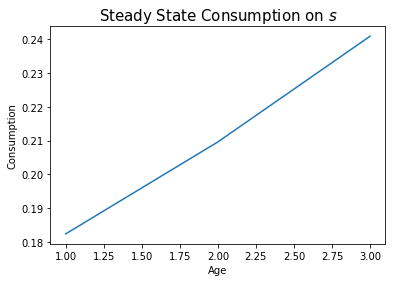

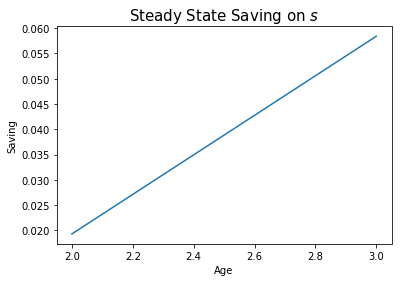

In [21]:
from matplotlib import pyplot as plt
s = np.array([1,2,3])
plt.plot(s,S['c_ss'])
plt.title('Steady State Consumption on $s$', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Consumption')
plt.show()

plt.plot(s[1:],S['b_ss'])
plt.title('Steady State Saving on $s$', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Saving')
plt.show()

### Exercise 2.3
What happens to each of these steady-state values if all households become more patient? What is the intuition?

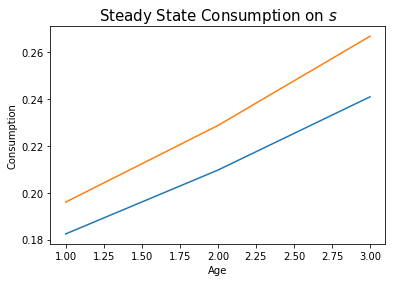

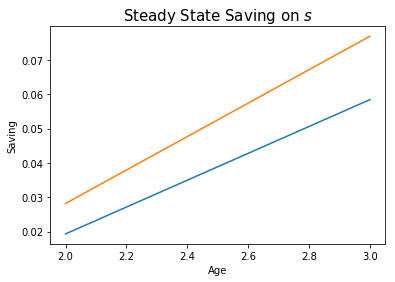

In [22]:
params1=(0.55, 3, np.array([1.0,1.0,0.2]), np.sum(np.array([1.0,1.0,0.2])), 1, 0.35, 0.6415, SS_tol)
S_mod = get_SS(params1, bvec_guess)

s = np.array([1,2,3])
plt.plot(s,S['c_ss'])
plt.plot(s,S_mod['c_ss'])
plt.title('Steady State Consumption on $s$', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Consumption')
plt.show()

plt.plot(s[1:],S['b_ss'])
plt.plot(s[1:],S_mod['b_ss'])
plt.title('Steady State Saving on $s$', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Saving')
plt.show()

In [16]:
print('The steady-state interest rates are : ', S['r_ss'],S_mod['r_ss'])
print('The steady-state wage rates are : ', S['w_ss'],S_mod['w_ss'])

The steady-state interest rates are :  2.433062339106576 1.8863765057415194
The steady-state wage rates are :  0.2017246573912498 0.22415219593339097


In [23]:
import numpy as np
import scipy.optimize as opt

n_vec = np.array([1.0,1.0,0.2])
r_path= np.array([0.04,0.05,0.0511])
w_path = np.array([1.2,1.18,1.17])
beta = 0.9
sigma = 2.2
b_2tpl = 1.0

S

{'C_ss': 0.6329006729415257,
 'EulErr_ss': array([-1.36276412e-09,  3.02372882e-09]),
 'K_ss': 0.07772362575396088,
 'RCerr_ss': 4.85722573273506e-17,
 'Y_ss': 0.6827603788626917,
 'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'r_ss': 2.433062339106576,
 'ss_time': 0.0007820000000000604,
 'w_ss': 0.2017246573912498}

If the value of beta (time preference) goes up, the household will save more to consume tomorrow. This lead to the over-accumulation of capital, which leads to the decrease of interest rate, and the improvement of effectiveness of labor(which eventually leads to the increase of captal).

### Exercise 2.3
Use time path iteration (TPI) to solve for the non-steady state equilibrium transition path of the economy from $(b2_1,b3_1) = (0.8 \bar{b2},1.1\bar{b3})$ to the steady-state $(\bar{b2},\bar{b3})$.

In [34]:
# Set parameters
import numpy as np

beta = 0.442
sigma = 3
n_vec = np.array([1.0,1.0,0.2])
A = 1.0
delta =0.6415
alpha = 0.35
SS_tol = 10**(-8)


params=(beta, sigma, n_vec, np.sum(n_vec), A, alpha, delta, SS_tol)

T = 50
path_toler = 1e-9
xi = 0.2
bvec_guess = np.array([0.3,0.4])

# Solve for the steady-state

S = get_SS(params, bvec_guess, SS_graphs=True)

b2bar, b3bar = S['b_ss']

# Set initial condition

b21 =0.8 * b2bar
b31 = 1.2 * b3bar

# Initial guess for K
K1 = b21 + b31
Kbar = b2bar + b3bar
Kpath = np.linspace(K1,Kbar,T)


def get_wpath(Kpath,w_args,T):
    
    alpha, A, nvec = w_args
    L = nvec[0]+nvec[1]+nvec[2]
    wpath = np.zeros((1,T))
    
    for i in range(T):
        wpath[0,i] = (1-alpha)*A*(Kpath[i]**alpha) * (L**(-alpha))
    
    return wpath


def get_rpath(Kpath, r_args,T):
    alpha, A, nvec,delta = r_args
    L = nvec[0]+nvec[1]+nvec[2]
    rpath = np.zeros((1,T))
    
    for i in range(T):
        rpath[0,i] = alpha*A*(Kpath[i]**(alpha-1)) * (L**(1-alpha))-delta
    
    return rpath


def Eul_err_b2t_b3tp1(bvec, *args):
    b2t,b3tp1 = bvec
    beta,sigma,r_t,r_tp1,n1,n2,n3,w_tm1,w_t,w_tp1 =  args
    
    eul_err1 = (w_tm1*n1 - b2t)**(-sigma) - beta*(1+r_t) * ((1+r_t)*b2t + w_t*n2 - b3tp1)**(-sigma)
    eul_err2 = ((1+r_t)*b2t + w_t*n2 - b3tp1)**(-sigma) - beta*(1+r_tp1) * ((1+r_tp1)*b3tp1 + w_tp1*n3)**(-sigma)
    eul_err = np.array([eul_err1,eul_err2])
    return eul_err

w_args = (alpha,A,n_vec)
r_args = (alpha,A,n_vec,delta)
rpath = get_rpath(Kpath,r_args,T)
wpath = get_wpath(Kpath,w_args,T)

#Note that we already know b21 & b31

bmat = np.zeros((T+1,2))
bmat[0,0] = b21 
bmat[0,1] = b31

# Calculate b32 
def Eul_errs1(b3, *args):
    
    b2, A, alpha, beta, sigma, nvec,delta,r_t,r_tp1,w_t,w_tp1 = args
           
    n1=nvec[0]
    n2=nvec[1]
    n3=nvec[2]
    
    c2 = (1+r_t)*b2 + w_t*n2 - b3
    c3 = (1+r_tp1)*b3 + w_tp1*n3
    
    err2 = (c2)**(-sigma) - beta * (1+r_tp1)*((c3)**(-sigma))
    err_vec = err2
    
    return err_vec

b3_init = 0.1
args1 = (b21,A,alpha,beta,sigma,n_vec,delta,rpath[0,0],rpath[0,1],wpath[0,0],wpath[0,1])
results = opt.root(Eul_errs1,b3_init,args=args1)
b32=results.x

# Save b32 to bmat
bmat[1,1] = b32

In [37]:
#Solve HH decisions

EULER_MAX = np.zeros((T-1,2))
RESOURCE_MAX = np.zeros((T-1,1))
n1=n_vec[0]
n2=n_vec[1]
n3=n_vec[2]

dist = 1
ITER_max = 200
ITER = 0
while (dist > 1e-20) and (ITER <ITER_max):
    for t in range(0,T-2):
    
        #args1 = (beta,sigma,rpath[0,t],rpath[0,t+1],n1,n2,n3,wpath[0,t-1],wpath[0,t],wpath[0,t+1]) 
        args1 = (beta,sigma,rpath[0,t+1],rpath[0,t+2],n1,n2,n3,wpath[0,t],wpath[0,t+1],wpath[0,t+2]) 
       # b2tm1, b3t = bmat[t-1,0],bmat[t,1]
        b2tm1, b3t = bmat[t,0],bmat[t+1,1]
    
        results = opt.root(Eul_err_b2t_b3tp1,np.array([b2tm1,b3t]),args=args1)
        b2t, b3tp1 =  results.x
        bmat[t+1,0],bmat[t+2,1] = b2t, b3tp1
        EULER_MAX[t,0] = results.fun[0]
        EULER_MAX[t,1] = results.fun[1]
        EULER_MAX[t,0] = results.fun[0]
        EULER_MAX[t,1] = results.fun[1]

        # Solve for b2 and b3
    

    Kpath_prime = bmat[:-2].sum(axis = 1)
    dist = ((Kpath_prime - Kpath[:-1])**2).sum()
    ITER +=1
    #print(dist,ITER)
    Kpath_new   = xi * Kpath_prime + (1-xi) * Kpath[:-1]
    Kpath = Kpath_new
    
    
    Kpath=np.append(Kpath, np.array([b2bar+b3bar]), axis=0)
    #plt.plot(Kpath-(b2bar+b3bar))
    rpath = get_rpath(Kpath,r_args,T)
    wpath = get_wpath(Kpath,w_args,T)   

In [38]:
# Step 5 : Restore the results and Plot!
RESOURCE_MAX = np.zeros((T-1,1))

for t in range(1,T-1):
    
    b2tm1 = bmat[t-1,0]
    b3tm1 = bmat[t-1,1]
    
    b2t = bmat[t,0]
    b3t = bmat[t,1]
    
    b2tp1 = bmat[t+1,0]
    b3tp1 = bmat[t+1,1]
    
    Kt = b2t+b3t
    Ktp1 = b2tp1 + b3tp1
    c1t = n1*wpath[0,t] - b2t
    c2t = (1+rpath[0,t])*b2tm1 + wpath[0,t]*n2 - b3t
    c3t = (1+rpath[0,t])*b3tm1+ wpath[0,t]*n3
    Ct = c1t+c2t+c3t
    Yt = A*(Kt**alpha)*((n1+n2+n3)**(1-alpha))
    RESOURCE_MAX[t,0] = Yt - Ct - Ktp1 + (1-delta)*Kt    

In [39]:
Resource_max = max(np.abs(RESOURCE_MAX))
Euler_max =  np.max(np.abs(EULER_MAX))
print('The maximum error of Resource constraint is : ', Resource_max)
print('The maximum error of Euler Equation is : ', Euler_max)

The maximum error of Resource constraint is :  [0.02515899]
The maximum error of Euler Equation is :  2.4593333591838018e-08


### Exercise 3.2
Plot the equilibrium time paths of the aggregate capital stock {K}, wage {w}, and interest rate {r }.

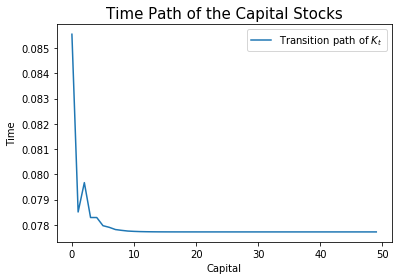

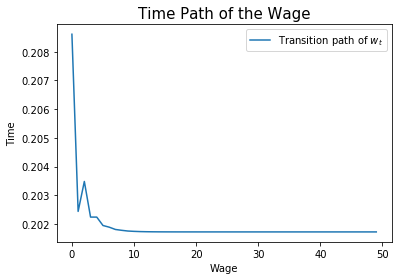

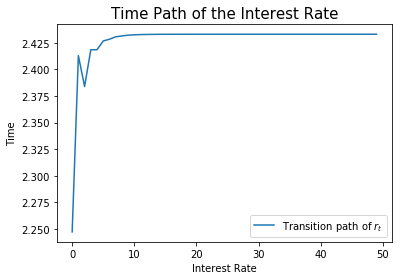

In [33]:
plt.plot(Kpath,label = 'Transition path of $K_t$')
plt.title('Time Path of the Capital Stocks', fontsize=15)
plt.xlabel('Capital')
plt.ylabel('Time')
plt.legend()
plt.show()

plt.plot(wpath.T,label = 'Transition path of $w_t$')
plt.title('Time Path of the Wage', fontsize=15)
plt.xlabel('Wage')
plt.ylabel('Time')
plt.legend()
plt.show()

plt.plot(rpath.T,label = 'Transition path of $r_t$')
plt.title('Time Path of the Interest Rate', fontsize=15)
plt.xlabel('Interest Rate')
plt.ylabel('Time')
plt.legend()
plt.show()

### Exercise 3.3
How many periods did it take for the economy to get within 0.00001 of the steady-state aggregate capital stock $\bar K$ ? What is the period after which the aggregate capital stock never is again farther than 0.00001 away from the steady-state?

In [40]:
KSS = b2bar+b3bar
for i in range(len(Kpath)):
    if np.abs(KSS-Kpath[i]) < 1e-5:
        break

Period = i+1
print(Period)

13
